In [1]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker

import warnings
warnings.filterwarnings("ignore")

***

# TweetsCov19
## KDE-Plot

***

In [2]:
path = '../data/tweetscov19_science_polarized_users_with_atleast_one_polarized_domain.tsv'

df_tweetscov19_science_polarized_and_neutralized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_antiscience_domains', 'Number_of_proscience_domains', 'Sum_polarised_domains', 'science'])

print('Shape :', df_tweetscov19_science_polarized_and_neutralized.shape)
df_tweetscov19_science_polarized_and_neutralized.head()

Shape : (44493, 5)


,Username,Number_of_antiscience_domains,Number_of_proscience_domains,Sum_polarised_domains,science
0,000238f324f5063164908c27a7f310cd,-1,0,1,-1.0000
1,0002eb2aff20e181397afe8cdebdd395,0,1,1,1.0000
2,00065a00b971b5e1629d504e0ddf2da0,-3,0,3,-1.0000
3,0006a238065c3acb128041e666b58f07,0,2,2,1.0000
4,000795932bf3bc3ab05b5efc1b07104b,-1,0,1,-1.0000


In [3]:
pfad_tsv = '../data/TweetsCov19_alltweets_reputation_deletionratio.tsv'

df_tweetscov19_alltweets_reputation_deletionratio = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'Reputation', 'num_posted', 'num_deleted', 'Deletionratio'])

print('Form :', df_tweetscov19_alltweets_reputation_deletionratio.shape)
df_tweetscov19_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,Reputation,num_posted,num_deleted,Deletionratio
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,764191,132,True,0.9998,21,21,1.0000
1,1181705842275573766,c57d4fb895c5f4a33d2a2b24709f93b5,765034,132,True,0.9998,21,21,1.0000
2,1187828746503540738,c57d4fb895c5f4a33d2a2b24709f93b5,766578,132,True,0.9998,21,21,1.0000
3,1192622772658290688,c57d4fb895c5f4a33d2a2b24709f93b5,767939,133,True,0.9998,21,21,1.0000
4,1193272068621717504,c57d4fb895c5f4a33d2a2b24709f93b5,768180,133,True,0.9998,21,21,1.0000


In [4]:
df_tweetscov19_alltweets_reputation_deletionratio = df_tweetscov19_alltweets_reputation_deletionratio[['Username', 'is_deleted', 'Reputation']]

df_tweetscov19_science_polarized_and_neutralized = df_tweetscov19_science_polarized_and_neutralized[['Username', 'science']]

df_tweetscov19 = pd.merge(df_tweetscov19_alltweets_reputation_deletionratio, df_tweetscov19_science_polarized_and_neutralized, on='Username', how='inner')
print('Form :', df_tweetscov19.shape)
df_tweetscov19.head()

Form : (905746, 4)


,Username,is_deleted,Reputation,science
0,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000
1,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000
2,cd45cd8eae02f9b33d9e7de16042534d,True,0.8605,-1.0000
3,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000
4,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000


****

In [2]:
path = '../data/tweetsCov19_polarized_users_deletionratio_reputation.tsv'

df_tweetscov19 = pd.read_csv(path, sep='\t', error_bad_lines=False, names=["Username", 'politic', 'science', 'moderacy', 'Deletion_ratio', 'Reputation', 'is_deleted'])

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (2216076, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,00008ca06f863b962f72cc9167d7978a,-1.0000,0.0000,-1.0000,0.0000,0.1828,False
1,00008de3f61d5f04329ee6867d5475b9,-1.0000,0.0000,1.0000,1.0000,0.6003,True
2,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
3,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
4,00016e20a3865cb74581803c27d27b89,-1.0000,0.0000,-1.0000,0.0000,0.5896,False


In [3]:
print('Alle Users:', df_tweetscov19.Username.unique().size)


Alle Users: 203725


In [4]:
df_tweetscov19 = df_tweetscov19[df_tweetscov19['science'] != 0]

print('Shape: ', df_tweetscov19.shape)
df_tweetscov19.head()

Shape:  (876719, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
76,00065a00b971b5e1629d504e0ddf2da0,-0.1111,-1.0000,-0.5556,0.0135,0.5193,False
77,00065a00b971b5e1629d504e0ddf2da0,-0.1111,-1.0000,-0.5556,0.0135,0.5193,False
78,00065a00b971b5e1629d504e0ddf2da0,-0.1111,-1.0000,-0.5556,0.0135,0.5193,False
79,00065a00b971b5e1629d504e0ddf2da0,-0.1111,-1.0000,-0.5556,0.0135,0.5193,False
80,00065a00b971b5e1629d504e0ddf2da0,-0.1111,-1.0000,-0.5556,0.0135,0.5193,False


In [4]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [5]:
print('Deleted Tweets:', df_tweetscov19_del.shape)
print('Non-deleted Tweets:', df_tweetscov19_undel.shape)

Deleted Tweets: (247363, 7)
Non-deleted Tweets: (629356, 7)


In [7]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['science']>0]
print('Alle pro. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['science']<0]
print('Alle anti. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 43943
Alle pro. Users in gesammten Tweets: 18352
Alle anti. Users in gesammten Tweets: 25591


In [8]:
print('Alle Users:', df_tweetscov19_del.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['science']>0]
print('Alle pro. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['science']<0]
print('Alle anti. Users in gelöschten Tweets:', df.Username.unique().size)

Alle Users: 15772
Alle pro. Users in gelöschten Tweets: 4096
Alle anti. Users in gelöschten Tweets: 11676


In [7]:
print('Alle Users:', df_tweetscov19_undel.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['science']>0]
print('Alle pro. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['science']<0]
print('Alle anti. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 33009
Alle pro. Users in nicht gelöschten Tweets: 16225
Alle anti. Users in nicht gelöschten Tweets: 16784


In [47]:
def plot_kdeplot_v1(df, hue, x, x_label, titel, name): 
    #fig = plt.figure()
    #ax = fig.add_subplot()
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('../plots/'+name+'.pdf')


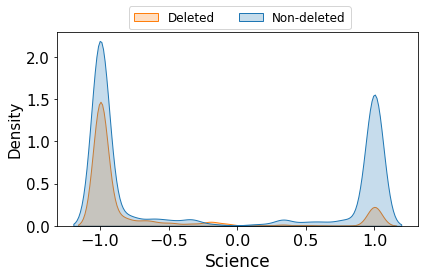

In [48]:
df = df_tweetscov19[['is_deleted', 'science']]
plot_kdeplot_v1(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetscov19_science_all_tweets_conditionaldistribution')

In [39]:
def plot_kdeplot_v2(df, hue, x, x_label, titel, name): 
    
    #fig = plt.figure()
    #ax = fig.add_subplot()
    #ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill", legend= False)

    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_title('Science', fontsize=17)
    ax.set_ylabel(ylabel='Density', fontsize=17)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=16)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig('../plots/'+name+'.pdf')


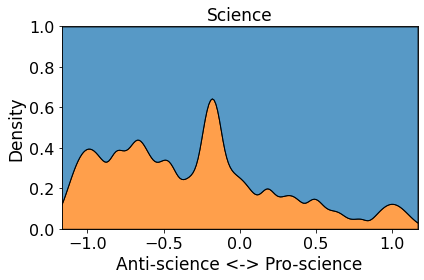

In [40]:
df = df_tweetscov19[['is_deleted', 'science']]
plot_kdeplot_v2(df, 'is_deleted','science' ,'Anti-science <-> Pro-science' ,'TweetsCov19', 'kdeplot_tweetscov19_science_all_tweets_Normalizethestackeddistribution')

In [51]:
def plot_kdeplot_v3(df, hue, x, x_label, titel, name): 
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    ax = sns.kdeplot(
    data=df, x=x, hue=hue,
    cumulative=True, common_norm=False, common_grid=True,
    )
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('../plots/'+name+'.pdf')


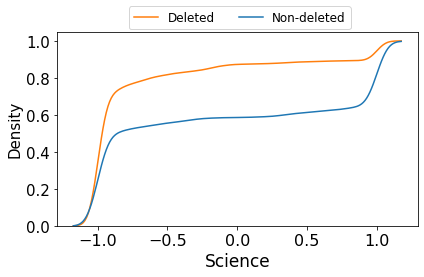

In [52]:
df = df_tweetscov19[['is_deleted', 'science']]
plot_kdeplot_v3(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetscov19_science_all_tweets_cumulativedistributionfunction')

***

# Histogram

***

In [9]:
def plot_histogram(df, titel):
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('gold')
    patches[1].set_label('Anti-Science')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('forestgreen')
    patches[9].set_label('Pro-Science')
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Number of users', fontsize=16)
    ax.set_xlabel(xlabel='Science', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=12)
    plt.tight_layout()
    plt.savefig('../plots/'+titel+'.pdf')

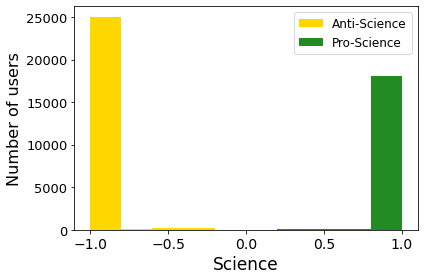

In [10]:
#Alle Tweets
df = df_tweetscov19.drop_duplicates(subset=['Username'])
plot_histogram(df['science'],'hist_tweetsCov19_science_polarized_users(alltweets)')

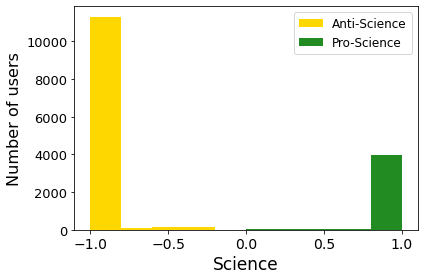

In [11]:
#Gelöschte Tweets
df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
plot_histogram(df['science'],'hist_tweetsCov19_science_polarized_users(deletedtweets)')

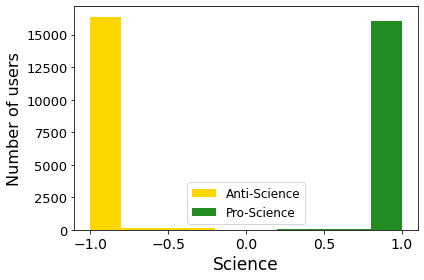

In [12]:
df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
plot_histogram(df['science'],'hist_tweetsCov19_science_polarized_users(nondeletedtweets)')

***

In [9]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [12]:
def plot_histogram(df, titel):
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('gold')
    patches[1].set_label('Anti-Science')
    for i in range(6,len(patches)):
        patches[i].set_facecolor('forestgreen')
    patches[9].set_label('Pro-Science')
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    ax.set_title('Science', fontsize=17)
    ax.set_ylabel('Number of users', fontsize=17)
    #ax.set_xlabel(xlabel='Science', fontsize=17)
    
    #f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
    #g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    #ax.yaxis.set_major_formatter(ticker.FuncFormatter(g))
    
    #plt.title('Political polarization', fontsize=18)
    #plt.legend(loc='upper center', fontsize=12)
    plt.legend( fontsize=12)

    plt.tight_layout()
    plt.savefig('../plots/'+titel+'.pdf')

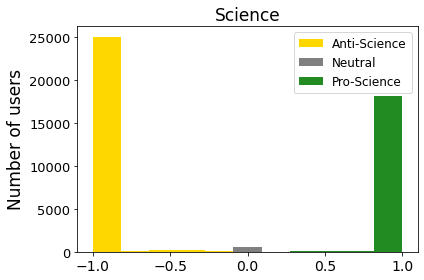

In [6]:
df = df_tweetscov19.drop_duplicates(subset=['Username'])
plot_histogram(df['science'],'hist_tweetsCov19_science_polarized_users(alltweets)')

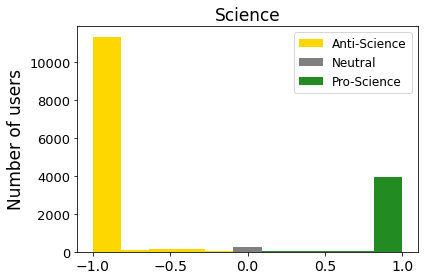

In [10]:
df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
plot_histogram(df['science'],'hist_tweetsCov19_science_polarized_users(deletedtweets)')

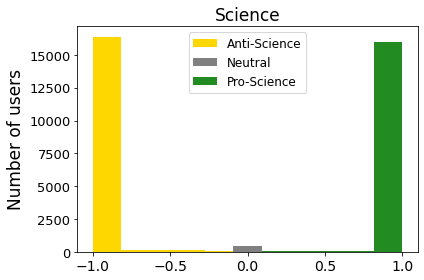

In [13]:
df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
plot_histogram(df['science'],'hist_tweetsCov19_science_polarized_users(nondeletedtweets)')

***

# Hexabin
### Reputation-Polarisierung

***

In [14]:
def plot_hexbin_reputaion(df, hue,x ,x_label, color, titel):

    ax = df.plot.hexbin(x=x, y="Reputation",cmap=color, gridsize=20, sharex=False)
    ax.set_ylabel(ylabel='Reputaion', fontsize=17)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=16)

    f = plt.gcf()
    cax = f.get_axes()[1]
    #cax.set_ylabel('test')
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    #formatter.set_useOffset(1000)
    
    cax.tick_params(labelsize=16)
    #cax.ticklabel_format(style='scientific', useMathText=True)
    
    cax.xaxis.set_major_formatter(formatter)
    cax.yaxis.set_major_formatter(formatter)
    
    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig('../plots/'+titel+'.pdf')
    plt.show()

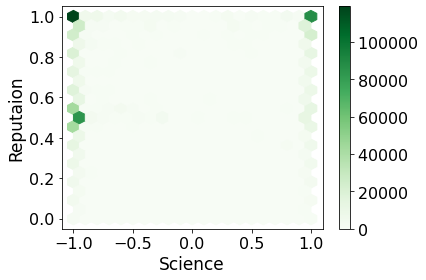

In [14]:
#All Tweets
df = df_tweetscov19[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted','science', 'Science', 'Greens', 'Hexabinplot_tweetscov19_science_reputation(alltweets)')

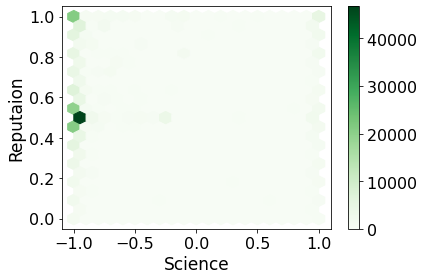

In [15]:
plot_hexbin_reputaion(df_del, 'is_deleted','science', 'Science', 'Greens', 'Hexabinplot_tweetscov19_science_reputation(deletedtweets)')

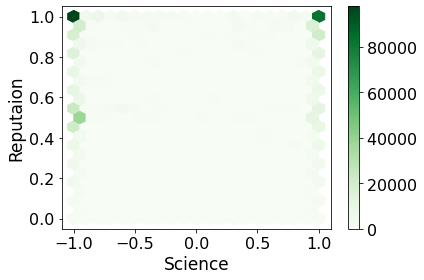

In [16]:
plot_hexbin_reputaion(df_undel, 'is_deleted','science', 'Science', 'Greens', 'Hexabinplot_tweetscov19_science_reputation(nondeletedtweets)')

****

In [5]:
def plot_heatmap(df, x, y,x_label, color, titel):
    
    df = df[[x, y]]
    df = df.round(1)
    zeros = (df == 0).sum()
    print('Number of zeros: \n', zeros)
    #df.replace(0, np.nan, inplace=True)
    df = df.groupby([x, y]).size().reset_index(name='count')

    
    heatmap_data = df.pivot(y, x, "count")
    heatmap_data = heatmap_data.sort_values(by=y,ascending=False)

    color = plt.get_cmap(color)   # default color
    color.set_bad('white')    # if the value is bad the color would be lightblue instead of white

    sns.set(font_scale=2)
    f, ax = plt.subplots(figsize=(7, 5))
    sns.heatmap(heatmap_data, square=False, norm= matplotlib.colors.LogNorm(), cbar_kws={"shrink": 1}, cmap=color)
    ax.tick_params(labelsize=15)
    ax.set_ylabel(ylabel='Reputaion', fontsize=17)
    ax.set_xlabel(xlabel=x_label, fontsize=17)
    #ax.figure.axes[-1].set_ylabel('Number of tweets', size=20)
    #ax.figure.axes[-1].set_ylabel( size=20)

    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig('../plots/heatmaps/'+titel+'.pdf')
    plt.show()

In [6]:
#All Tweets
df = df_tweetscov19[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

Number of zeros: 
 science         50
Reputation    4477
dtype: int64


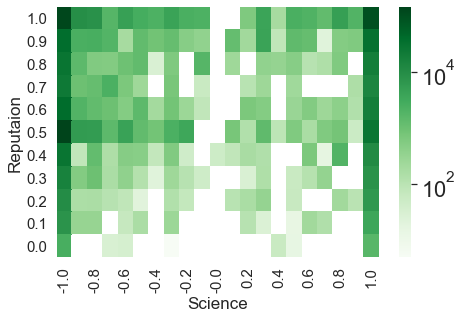

In [7]:
import matplotlib.pyplot as plt
plot_heatmap(df, 'science','Reputation', 'Science', 'Greens', 'Heatmap_tweetscov19_science_reputation(alltweets)_1')

Number of zeros: 
 science         50
Reputation    2342
dtype: int64


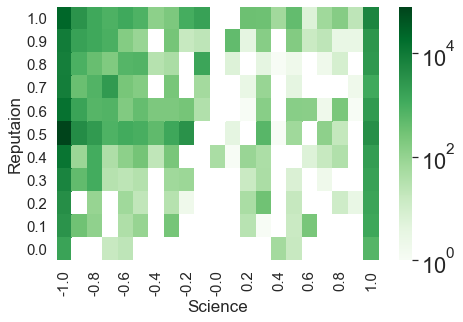

In [8]:
plot_heatmap(df_del, 'science','Reputation', 'Science', 'Greens', 'Heatmap_tweetscov19_science_reputation(deletedtweets)_1')

Number of zeros: 
 science          0
Reputation    2135
dtype: int64


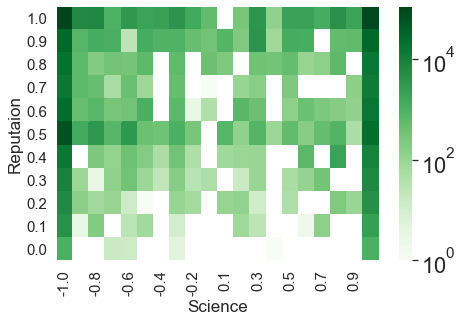

In [9]:
plot_heatmap(df_undel, 'science','Reputation', 'Science', 'Greens', 'Heatmap_tweetscov19_science_reputation(nondeletedtweets)_1')

****

***

# TweetKB
## KDE-Plot

***

In [41]:
path = '../data/tweetskb_science_polarized_users_with_atleast_one_polarized_domain.tsv'

df_tweetskb_science_polarized_and_neutralized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_antiscience_domains', 'Number_of_proscience_domains', 'Sum_polarised_domains', 'science'])

print('Shape :', df_tweetskb_science_polarized_and_neutralized.shape)
df_tweetskb_science_polarized_and_neutralized.head()

Shape : (15325, 5)


,Username,Number_of_antiscience_domains,Number_of_proscience_domains,Sum_polarised_domains,science
0,000000hSure,-1,0,1,-1.0000
1,01splcheck,-1,0,1,-1.0000
2,01sth02,0,1,1,1.0000
3,0Bettymowery2,-1,0,1,-1.0000
4,0Ludicris5,-2,0,2,-1.0000


In [42]:
path = '../data/TweetsKB_alltweets_reputation_deletionratio.tsv'

df_tweetskb_alltweets_reputation_deletionratio = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'num_posted', 'num_del', 'Deletionratio',  'Reputation'])

print('Form :', df_tweetskb_alltweets_reputation_deletionratio.shape)
df_tweetskb_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,num_posted,num_del,Deletionratio,Reputation
0,1178791636039589889,DCComics,3349606,563,False,42,0,0.0000,0.9998
1,1179833467644850176,DCComics,3351904,563,False,42,0,0.0000,0.9998
2,1180490470125965313,DCComics,3354879,563,False,42,0,0.0000,0.9998
3,1187059882534400000,DCComics,3369484,562,False,42,0,0.0000,0.9998
4,1190311668141580288,DCComics,3376154,564,False,42,0,0.0000,0.9998


In [43]:
df_tweetskb_alltweets_reputation_deletionratio = df_tweetskb_alltweets_reputation_deletionratio[['Username', 'is_deleted', 'Reputation']]

df_tweetskb_science_polarized_and_neutralized = df_tweetskb_science_polarized_and_neutralized[['Username', 'science']]

df_tweetskb = pd.merge(df_tweetskb_alltweets_reputation_deletionratio, df_tweetskb_science_polarized_and_neutralized, on='Username', how='inner')
print('Form :', df_tweetskb.shape)
df_tweetskb.head()

Form : (159330, 4)


,Username,is_deleted,Reputation,science
0,caveofbeauty,False,0.9898,1.0000
1,caveofbeauty,False,0.9898,1.0000
2,caveofbeauty,False,0.9898,1.0000
3,caveofbeauty,False,0.9898,1.0000
4,caveofbeauty,False,0.9898,1.0000


***

In [16]:
pfad_tsv1 = '../data/tweetsKB_polarized_users_deletionratio_reputation.tsv'

df_tweetskb = pd.read_csv(pfad_tsv1, sep='\t', error_bad_lines=False, names=["Username", 'politic', 'science', 'moderacy', 'Deletion_ratio', 'Reputation', 'is_deleted'])
pd.options.display.max_columns = None
print('Shape :', df_tweetskb.shape)
df_tweetskb.head()

Shape : (552665, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,0000Condor,-1.0000,0.0000,1.0000,1.0000,0.2556,True
1,007newsandviews,-1.0000,0.0000,-1.0000,0.0000,0.4828,False
2,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
3,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
4,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False


In [11]:
print('Alle Users:', df_tweetskb.Username.unique().size)


Alle Users: 78638


In [12]:
df_tweetskb = df_tweetskb[df_tweetskb['science'] != 0]

print('Shape: ', df_tweetskb.shape)
df_tweetskb.head()

Shape:  (157172, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
50,0Bettymowery2,0.3333,-1.0000,0.3333,0.0000,0.4324,False
51,0Bettymowery2,0.3333,-1.0000,0.3333,0.0000,0.4324,False
52,0Bettymowery2,0.3333,-1.0000,0.3333,0.0000,0.4324,False
53,0Bettymowery2,0.3333,-1.0000,0.3333,0.0000,0.4324,False
54,0Bettymowery2,0.3333,-1.0000,0.3333,0.0000,0.4324,False


In [8]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [9]:
print('Deleted Tweets:', df_tweetskb_del.shape)
print('Non-deleted Tweets:', df_tweetskb_undel.shape)

Deleted Tweets: (62327, 7)
Non-deleted Tweets: (94845, 7)


In [20]:
df_tweetskb_del.shape

(62327, 7)

In [21]:
print('Alle Users:', df_tweetskb.Username.unique().size)

df = df_tweetskb[df_tweetskb['science']>0]
print('Alle pro. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetskb[df_tweetskb['science']<0]
print('Alle anti. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 15262
Alle pro. Users in gesammten Tweets: 4769
Alle anti. Users in gesammten Tweets: 10493


In [22]:
print('Alle Users:', df_tweetskb_del.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['science']>0]
print('Alle pro. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['science']<0]
print('Alle anti. Users in gelöschten Tweets:', df.Username.unique().size)

Alle Users: 5616
Alle pro. Users in gelöschten Tweets: 736
Alle anti. Users in gelöschten Tweets: 4880


In [23]:
print('Alle Users:', df_tweetskb_undel.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['science']>0]
print('Alle pro. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['science']<0]
print('Alle anti. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 10472
Alle pro. Users in nicht gelöschten Tweets: 4251
Alle anti. Users in nicht gelöschten Tweets: 6221


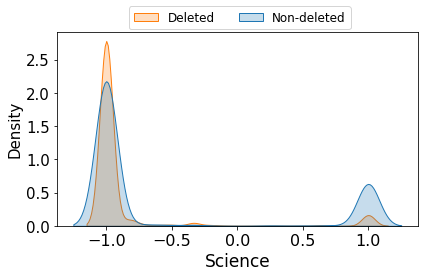

In [44]:
df = df_tweetskb[['is_deleted', 'science']]
plot_kdeplot_v1(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetskb_science_all_tweets_conditionaldistribution')

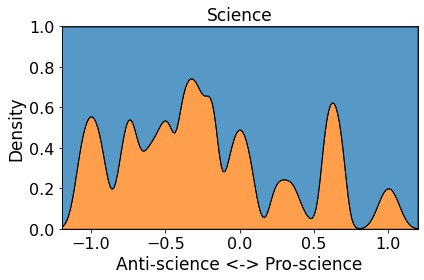

In [45]:
df = df_tweetskb[['is_deleted', 'science']]
plot_kdeplot_v2(df, 'is_deleted','science' ,'Anti-science <-> Pro-science' ,'TweetsCov19', 'kdeplot_tweetskb_science_all_tweets_Normalizethestackeddistribution')

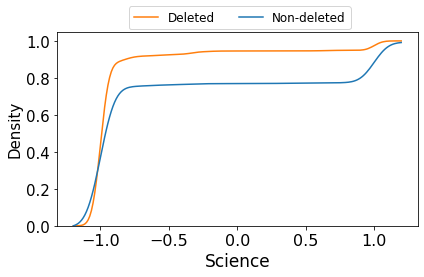

In [54]:
df = df_tweetskb[['is_deleted', 'science']]
plot_kdeplot_v3(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetskb_science_all_tweets_cumulativedistributionfunction')

***

# Histogram

***

In [23]:
def plot_histogram_kb(df, titel):
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('khaki')
    patches[1].set_label('Anti-Science')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('green')
    patches[9].set_label('Pro-Science')
        
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Number of users', fontsize=16)
    ax.set_xlabel(xlabel='Science', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=12)
    plt.tight_layout()

    plt.savefig('../plots/'+titel+'.pdf')

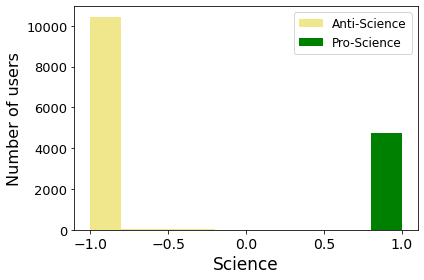

In [37]:
df = df_tweetskb.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['science'], 'hist_tweetsKB_science_polarized_users(alltweets)')

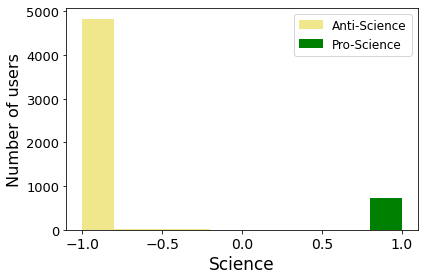

In [38]:
df = df_tweetskb_del.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['science'], 'hist_tweetsKB_science_polarized_users(deletedtweets)')

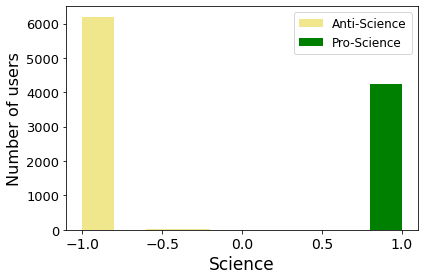

In [39]:
df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['science'], 'hist_tweetsKB_science_polarized_users(nondeletedtweets)')

---

In [26]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [27]:
def plot_histogram_kb(df, titel):
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('khaki')
    patches[1].set_label('Anti-Science')
    for i in range(6,len(patches)):
        patches[i].set_facecolor('green')
    patches[9].set_label('Pro-Science')
        
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    ax.set_title('Science', fontsize=17)
    ax.set_ylabel('Number of users', fontsize=17)
    #ax.set_xlabel(xlabel='Science', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=12)
    plt.tight_layout()

    plt.savefig('../plots/'+titel+'.pdf')

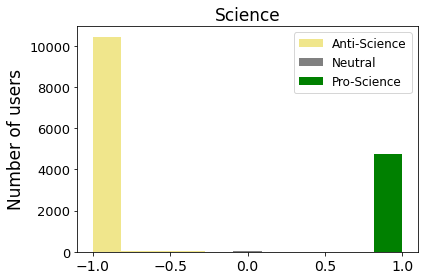

In [28]:
#All Tweets
df = df_tweetskb.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['science'],'hist_tweetsKB_science_polarized_users(alltweets)')

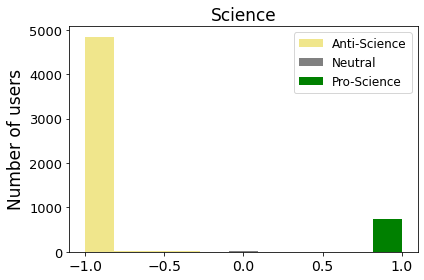

In [29]:
df = df_tweetskb_del.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['science'],'hist_tweetsKB_science_polarized_users(deletedtweets)')

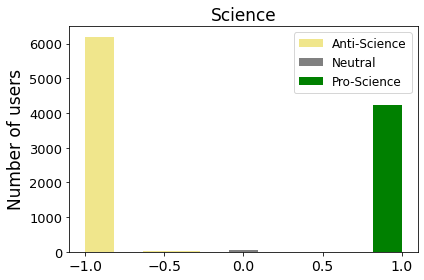

In [30]:
df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['science'],'hist_tweetsKB_science_polarized_users(nondeletedtweets)')

***

# Hexabin
### Reputation-Polarisierung

***

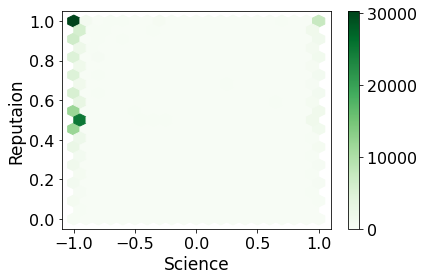

In [18]:
df = df_tweetskb[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted', 'science', 'Science', 'Greens', 'Hexabinplot_tweetsKB_science_reputation(alltweets)')

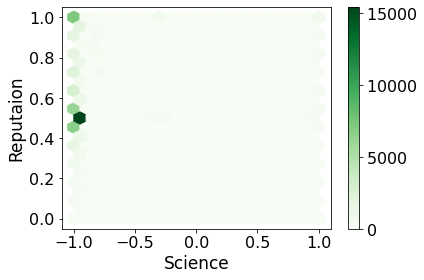

In [19]:
plot_hexbin_reputaion(df_del, 'is_deleted', 'science', 'Science', 'Greens','Hexabinplot_tweetsKB_science_reputation(deletedtweets)')

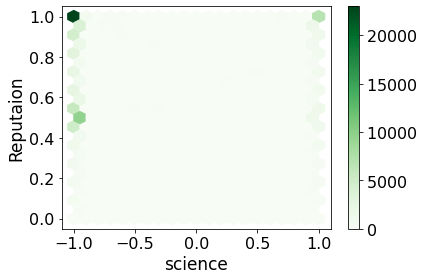

In [20]:
plot_hexbin_reputaion(df_undel, 'is_deleted', 'science', 'science', 'Greens', 'Hexabinplot_tweetsKB_science_reputation(nondeletedtweets)')

***

In [13]:
#All Tweets
df = df_tweetskb[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

Number of zeros: 
 science         0
Reputation    497
dtype: int64


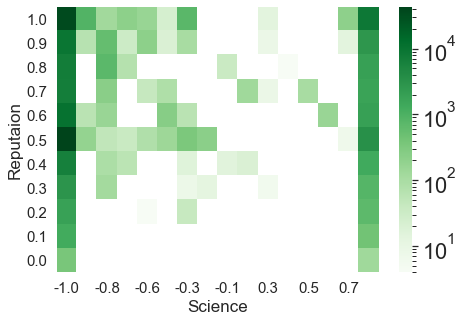

In [14]:
import matplotlib.pyplot as plt
plot_heatmap(df, 'science','Reputation', 'Science', 'Greens', 'Heatmap_tweetskb_science_reputation(alltweets)_1')

Number of zeros: 
 science         0
Reputation    247
dtype: int64


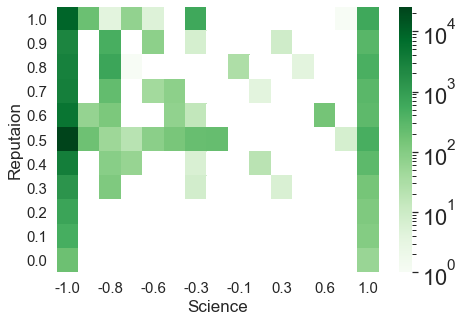

In [15]:
plot_heatmap(df_del, 'science','Reputation', 'Science', 'Greens', 'Heatmap_tweetskb_science_reputation(deletedtweets)_1')

Number of zeros: 
 science         0
Reputation    250
dtype: int64


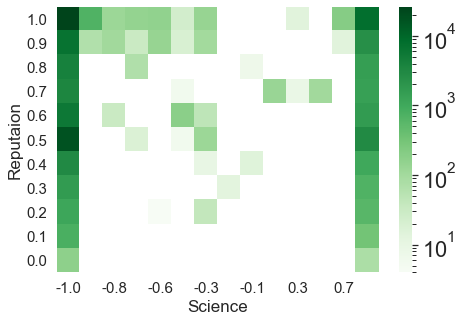

In [16]:
plot_heatmap(df_undel, 'science','Reputation', 'Science', 'Greens', 'Heatmap_tweetskb_science_reputation(nondeletedtweets)_1')